In [1]:
#Importing Relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [2]:
df = pd.read_csv('nigeria_agricultural_exports.csv')

In [3]:
df.head(2)

,Product Name,Company,Export Country,Date,Units Sold,unit_price,Profit per unit,Export Value,Destination Port
0,Rubber,Farmgate Nigeria Limited,Austria,11/16/2023,721,31443.05,5863.92,22670439.05,Lagos
1,Palm Oil,Prime Agro Exports Nigeria Limited,Germany,01/08/2021,881,23151.97,5868.73,20396885.57,Lagos


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Product Name      1000 non-null   object        
 1   Company           1000 non-null   object        
 2   Export Country    1000 non-null   object        
 3   Date              1000 non-null   datetime64[ns]
 4   Units Sold        1000 non-null   int64         
 5   unit_price        1000 non-null   float64       
 6   Profit per unit   1000 non-null   float64       
 7   Export Value      1000 non-null   float64       
 8   Destination Port  1000 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 70.4+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df['Sales Revenue'] = df['Units Sold'] * df['unit_price']

In [7]:
df['Total Profit'] = df['Profit per unit'] * df['Units Sold']

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Product Name      1000 non-null   object        
 1   Company           1000 non-null   object        
 2   Export Country    1000 non-null   object        
 3   Date              1000 non-null   datetime64[ns]
 4   Units Sold        1000 non-null   int64         
 5   unit_price        1000 non-null   float64       
 6   Profit per unit   1000 non-null   float64       
 7   Export Value      1000 non-null   float64       
 8   Destination Port  1000 non-null   object        
 9   Sales Revenue     1000 non-null   float64       
 10  Total Profit      1000 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 86.1+ KB


In [8]:
pd.options.display.float_format = '{:,.2f}'.format

##### ●	What are the top-selling products?

In [9]:
df.groupby(['Product Name'])['Sales Revenue'].sum().sort_values(ascending = False)

Product Name
Cocoa      2,384,888,721.15
Sesame     2,268,607,546.71
Rubber     2,118,009,970.58
Cashew     2,110,678,804.05
Palm Oil   1,974,585,531.93
Plantain   1,947,169,761.10
Cassava    1,913,308,279.39
Ginger     1,600,415,863.66
Name: Sales Revenue, dtype: float64

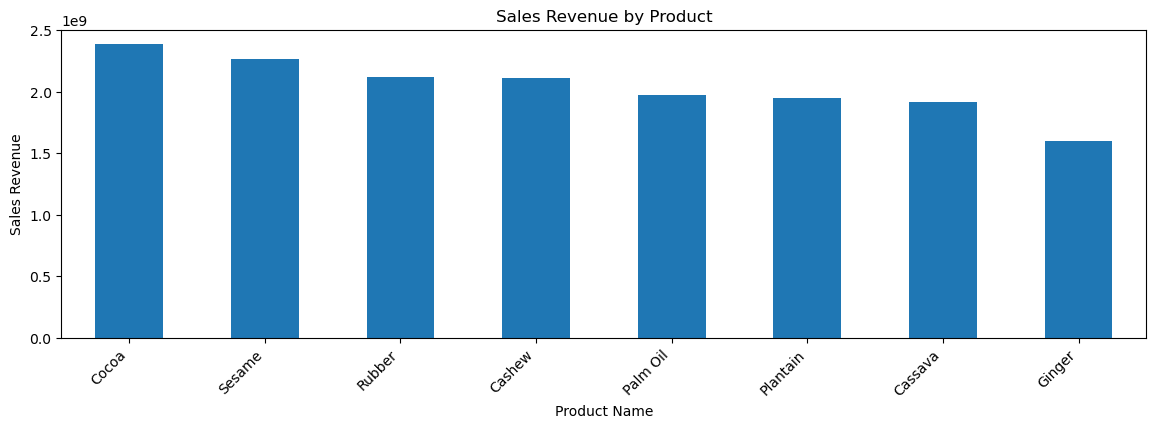

In [162]:
# Group by 'Product Name' and sum 'Sales Revenue', then sort values in descending order
product_sales = df.groupby(['Product Name'])['Sales Revenue'].sum().sort_values(ascending=False)

# Plotting the sales revenue for each product
plt.figure(figsize=(14, 4))
product_sales.plot(kind='bar')
plt.title('Sales Revenue by Product')
plt.xlabel('Product Name')
plt.ylabel('Sales Revenue')
plt.xticks(rotation=45, ha='right')
plt.show()

##### ●	Which company has the highest sales revenue?

In [82]:
company_with_most_SalesRevenue = df.groupby(['Company'])['Sales Revenue'].sum().sort_values(ascending = False)[:1]
print("Company with Highest Sales Revenue is:: \n", company_with_most_SalesRevenue)

Company with Highest Sales Revenue is:: 
 Company
Agro Export Nigeria Ltd   1,867,914,625.18
Name: Sales Revenue, dtype: float64


##### ●	How do sales vary across different export countries? 

In [151]:
grouped_data = df.groupby(['Export Country'])['Sales Revenue'].sum().sort_values(ascending = False)
print(grouped_data)

Export Country
Italy         1,962,586,623.20
Denmark       1,831,246,092.84
France        1,805,863,662.80
Switzerland   1,663,789,719.93
Belgium       1,605,706,575.07
Netherlands   1,534,358,434.51
Austria       1,530,520,956.64
Sweden        1,497,262,525.79
Spain         1,489,988,920.15
Germany       1,396,340,967.64
Name: Sales Revenue, dtype: float64


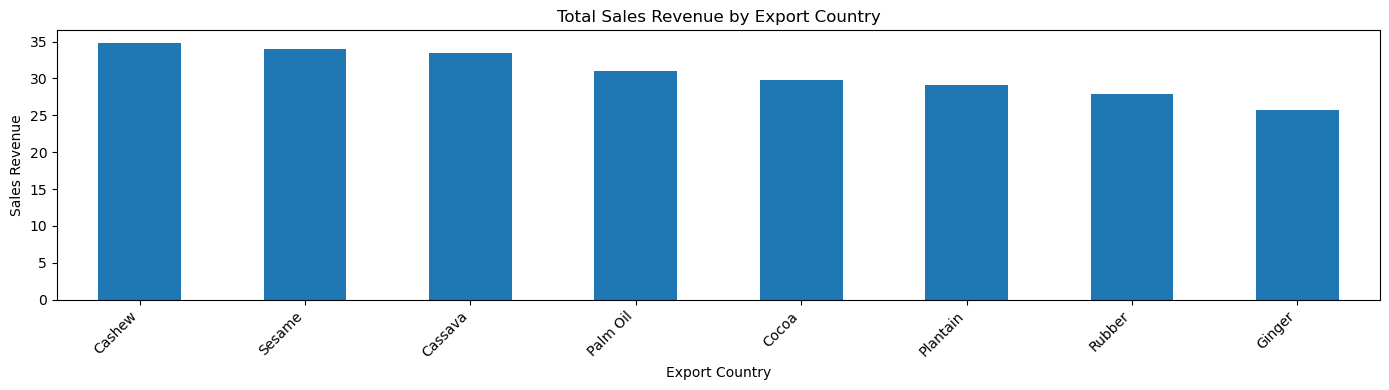

In [163]:
# Plotting the grouped and sorted data
plt.figure(figsize=(14, 4))
grouped_data.plot(kind='bar')
plt.title('Total Sales Revenue by Export Country')
plt.xlabel('Export Country')
plt.ylabel('Sales Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### ●	How do sales vary across different export countries? By Average

In [102]:
df.groupby(['Export Country'])['Sales Revenue'].mean().sort_values(ascending = False)

Export Country
Italy         18,514,968.14
France        17,198,701.55
Denmark       16,497,712.55
Switzerland   16,473,165.54
Belgium       16,384,760.97
Spain         16,373,504.62
Germany       16,049,896.18
Netherlands   15,498,570.05
Austria       15,305,209.57
Sweden        14,679,044.37
Name: Sales Revenue, dtype: float64

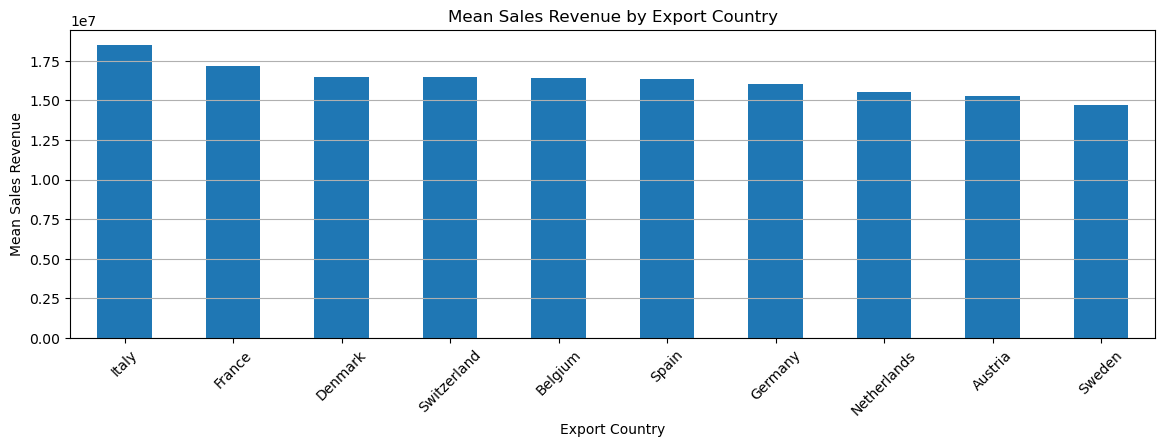

In [164]:
mean_sales_revenue = df.groupby('Export Country')['Sales Revenue'].mean().sort_values(ascending=False)

# Plotting the mean sales revenue for each export country
plt.figure(figsize=(14, 4))
mean_sales_revenue.plot(kind='bar')
plt.title('Mean Sales Revenue by Export Country')
plt.xlabel('Export Country')
plt.ylabel('Mean Sales Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

##### ●	How do sales vary across different export countries? Total Units Sold

In [103]:
df.groupby(['Export Country'])['Units Sold'].sum().sort_values(ascending = False)

Export Country
Denmark        59949
Italy          59769
France         56997
Switzerland    53929
Sweden         52187
Austria        51883
Belgium        51850
Spain          51450
Netherlands    50453
Germany        48337
Name: Units Sold, dtype: int64

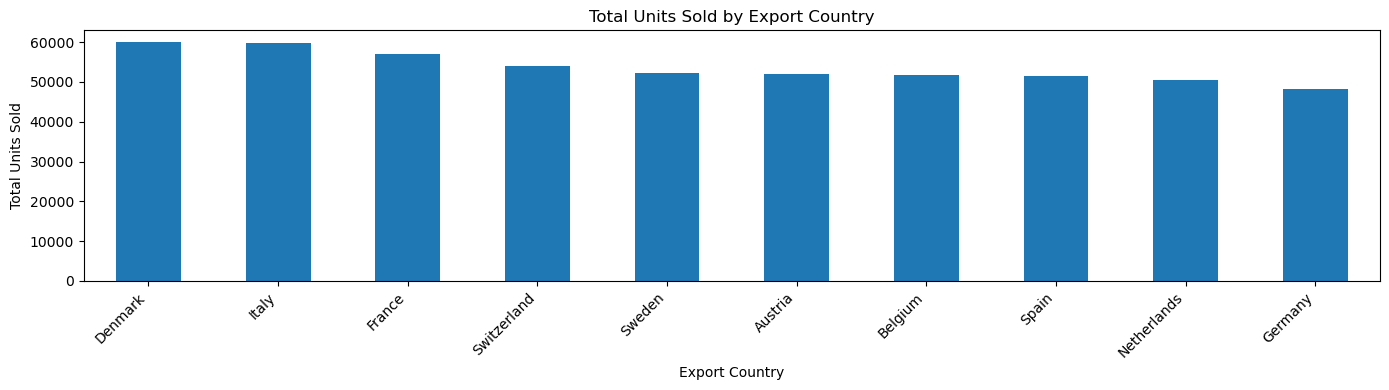

In [165]:
grouped_data = df.groupby(['Export Country'])['Units Sold'].sum().sort_values(ascending=False)

# Plotting the data
plt.figure(figsize=(14, 4))
grouped_data.plot(kind='bar')
plt.title('Total Units Sold by Export Country')
plt.xlabel('Export Country')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### ●	Is there any correlation between the units sold and the profit generated?

In [104]:
# Calculate the correlation between 'Units Sold' and 'Total Profit'
correlation = df['Units Sold'].corr(df['Total Profit'])

# Display the correlation coefficient
print("Correlation between Units Sold and Total Profit:", correlation)

Correlation between Units Sold and Total Profit: 0.7629331672996126


In [10]:
##Creating the Profit Margin Column
df['Profit Margin'] = df['Total Profit'] / df['Sales Revenue']

In [117]:
#Creating Year And Month Columns

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

##### ●	How do sales vary over time (monthly, quarterly, annually)?

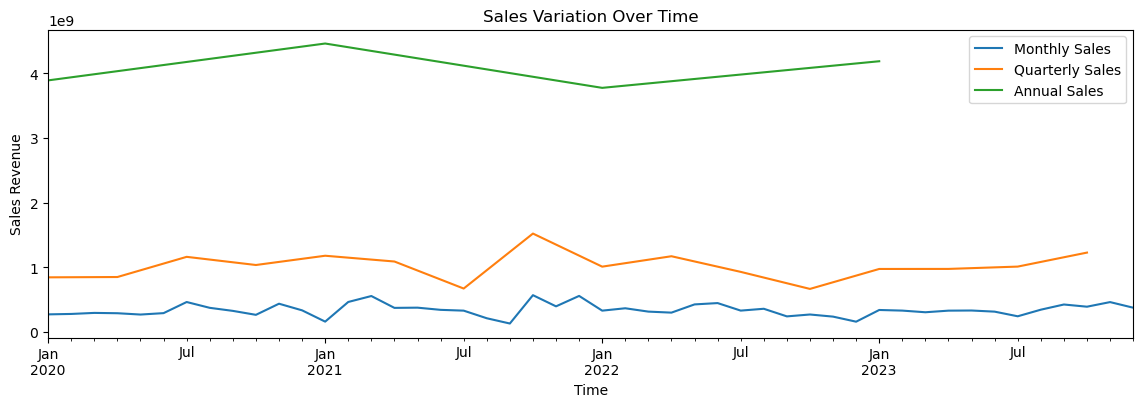

In [166]:
# Group by 'Date' at different time frequencies (monthly, quarterly, annually) and sum 'Sales Revenue'
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Sales Revenue'].sum()
quarterly_sales = df.groupby(df['Date'].dt.to_period('Q'))['Sales Revenue'].sum()
annual_sales = df.groupby(df['Date'].dt.to_period('Y'))['Sales Revenue'].sum()

# Plotting the sales variations over time
plt.figure(figsize=(14, 4))
monthly_sales.plot(label='Monthly Sales')
quarterly_sales.plot(label='Quarterly Sales')
annual_sales.plot(label='Annual Sales')
plt.xlabel('Time')
plt.ylabel('Sales Revenue')
plt.title('Sales Variation Over Time')
plt.legend()
plt.show()

##### Year

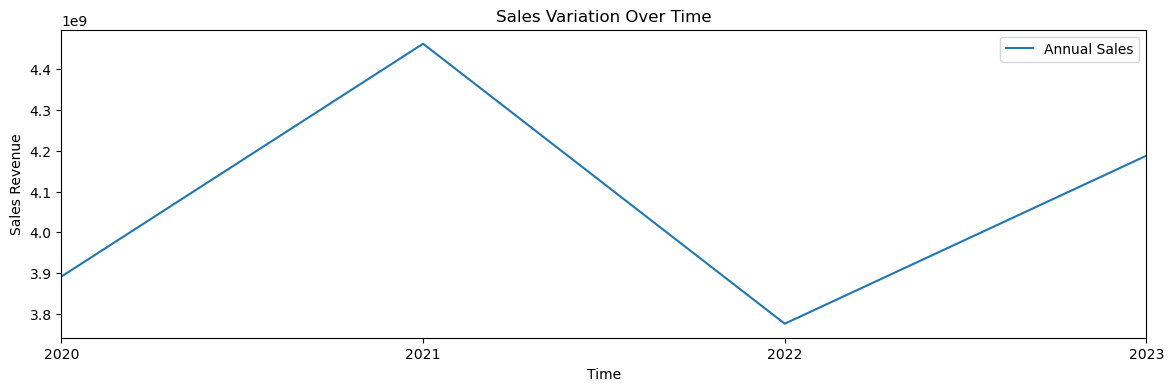

In [167]:
annual_sales = df.groupby(df['Date'].dt.to_period('Y'))['Sales Revenue'].sum()
plt.figure(figsize=(14, 4))
annual_sales.plot(label='Annual Sales')
plt.xlabel('Time')
plt.ylabel('Sales Revenue')
plt.title('Sales Variation Over Time')
plt.legend()
plt.show()

##### Month

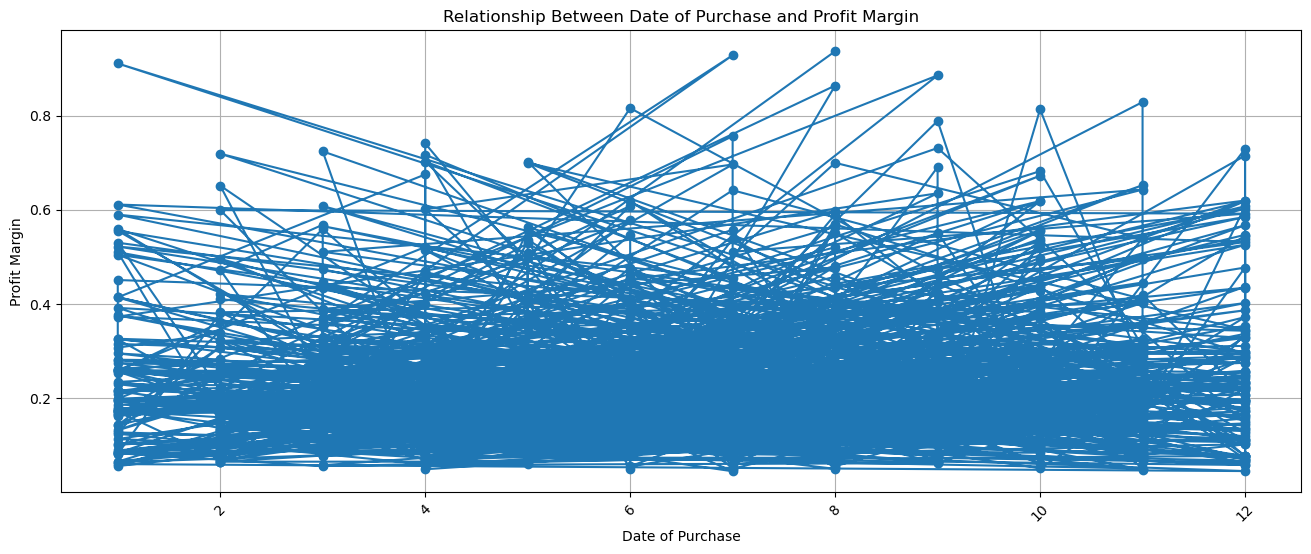

In [121]:
# Plotting the relationship between date of purchase and profit margin
plt.figure(figsize=(16, 6))
plt.plot(df['Month'], df['Profit Margin'], marker='o', linestyle='-')
plt.xlabel('Date of Purchase')
plt.ylabel('Profit Margin')
plt.title('Relationship Between Date of Purchase and Profit Margin')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### ●	What is the cost of goods sold (COGS) as a percentage of revenue?

In [15]:
# Calculate COGS
df['COGS'] = df['Units Sold'] * (df['unit_price'] - df['Profit per unit'])

In [16]:
# Calculate COGS as a percentage of revenue
df['COGS_Percentage'] = (df['COGS'] / df['Sales Revenue']) * 100

# Display the COGS percentage
print("COGS as a percentage of revenue:")
print(df['COGS_Percentage'])

COGS as a percentage of revenue:
0     81.35
1     74.65
2     72.46
3     64.60
4     28.51
       ... 
995   81.68
996   67.41
997   87.12
998   84.54
999    6.36
Name: COGS_Percentage, Length: 1000, dtype: float64


##### ●	How does the COGS vary across different products?

In [133]:
df.groupby(['Product Name'])['COGS_Percentage'].sum().sort_values(ascending = False)

Product Name
Cocoa      10,625.80
Cashew     10,421.51
Sesame      9,897.54
Rubber      9,714.93
Palm Oil    9,301.06
Plantain    9,288.64
Cassava     8,661.51
Ginger      7,526.27
Name: COGS_Percentage, dtype: float64

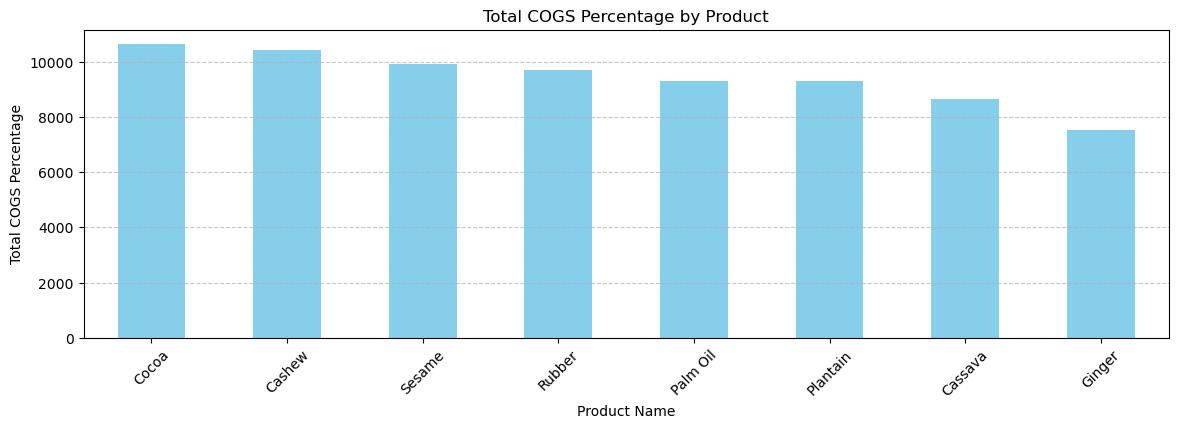

In [168]:
# Group by 'Product Name', calculate sum of COGS percentages, and sort values in descending order
grouped_data = df.groupby(['Product Name'])['COGS_Percentage'].sum().sort_values(ascending=False)

# Plotting the data as a bar plot
plt.figure(figsize=(14, 4))
grouped_data.plot(kind='bar', color='skyblue')
plt.title('Total COGS Percentage by Product')
plt.xlabel('Product Name')
plt.ylabel('Total COGS Percentage')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### ●	Which destination ports receive the highest volume of exports?

In [134]:
df['Destination Port'].value_counts()

Destination Port
Lagos            599
Warri            141
Port Harcourt    133
Calabar          127
Name: count, dtype: int64

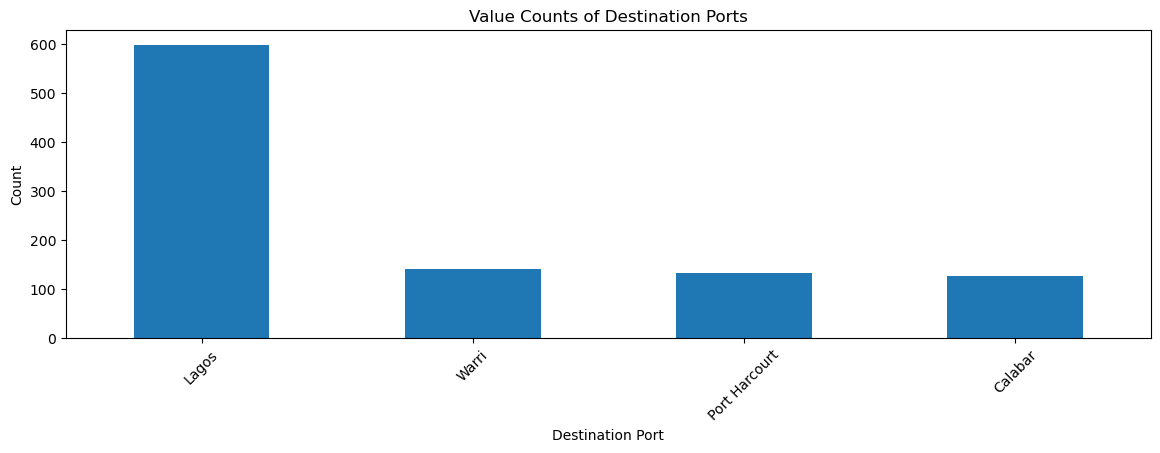

In [169]:
plt.figure(figsize=(14, 4))
df['Destination Port'].value_counts().plot(kind='bar')
plt.title('Value Counts of Destination Ports')
plt.xlabel('Destination Port')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### ●	Rank the destination port by the export value.

In [135]:
df.groupby(['Destination Port'])['Sales Revenue'].sum().sort_values(ascending = False)

Destination Port
Lagos           9,738,667,212.62
Warri           2,347,899,567.55
Port Harcourt   2,152,910,058.07
Calabar         2,078,187,640.33
Name: Sales Revenue, dtype: float64

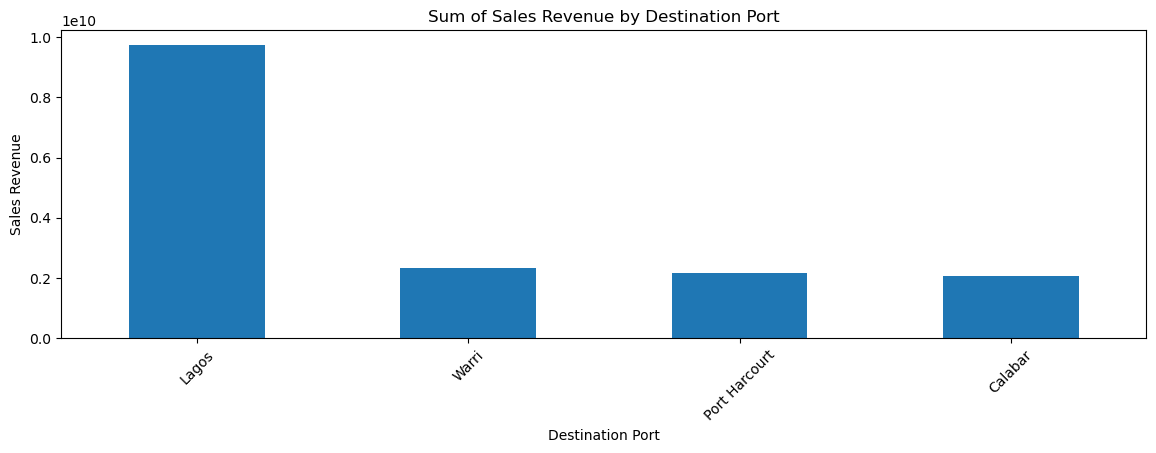

In [170]:
# Group by 'Destination Port' and calculate the sum of 'Sales Revenue' for each port
grouped_data = df.groupby(['Destination Port'])['Sales Revenue'].sum().sort_values(ascending=False)

# Plotting the grouped sum of 'Sales Revenue' by 'Destination Port'
plt.figure(figsize=(14, 4))
grouped_data.plot(kind='bar')
plt.title('Sum of Sales Revenue by Destination Port')
plt.xlabel('Destination Port')
plt.ylabel('Sales Revenue')
plt.xticks(rotation=45)
plt.show()

##### ●	Show the top export product for each port.

In [138]:
top_export_products = df.groupby('Destination Port').apply(lambda x: x.loc[x['Export Value'].idxmax()])
# Display the top export product for each port
print(top_export_products[['Destination Port', 'Product Name', 'Export Value']])

                 Destination Port Product Name  Export Value
Destination Port                                            
Calabar                   Calabar      Cassava 39,941,442.45
Lagos                       Lagos        Cocoa 47,120,823.21
Port Harcourt       Port Harcourt      Cassava 42,074,683.47
Warri                       Warri       Sesame 41,215,428.21


##### ●	How does each product perform in terms of profit margin?

In [140]:
df.groupby(['Product Name'])['Profit Margin'].sum().sort_values(ascending =  False)

Product Name
Cashew     34.78
Sesame     34.02
Cassava    33.38
Palm Oil   30.99
Cocoa      29.74
Plantain   29.11
Rubber     27.85
Ginger     25.74
Name: Profit Margin, dtype: float64

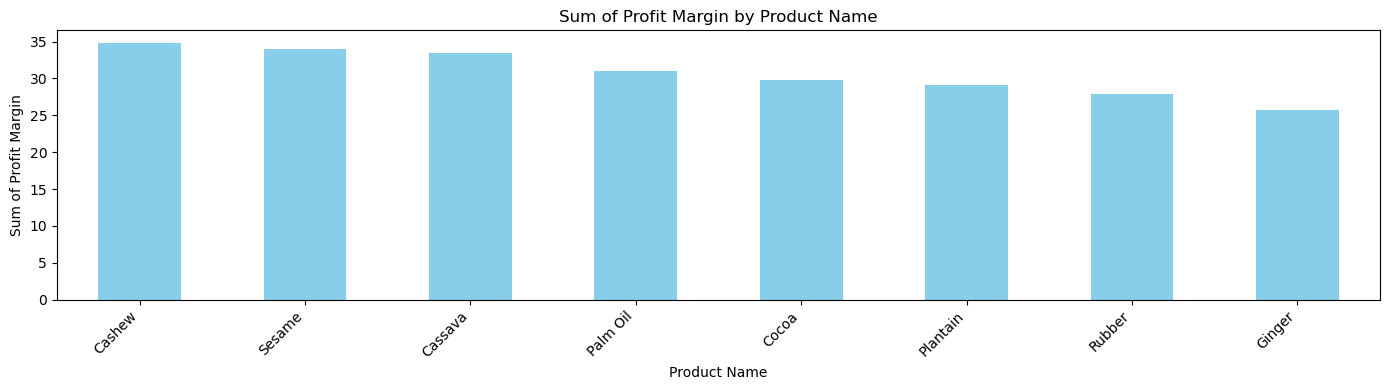

In [171]:
# Group by 'Product Name' and sum 'Profit Margin', then sort values in descending order
grouped_data = df.groupby('Product Name')['Profit Margin'].sum().sort_values(ascending=False)

# Plotting the grouped sum of 'Profit Margin' by 'Product Name'
plt.figure(figsize=(14, 4))
grouped_data.plot(kind='bar', color='skyblue')
plt.title('Sum of Profit Margin by Product Name')
plt.xlabel('Product Name')
plt.ylabel('Sum of Profit Margin')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### ●	Can we compare the performance of different companies based on units sold and profit generated?

In [146]:
# Aggregate data by company to calculate total units sold and total profit
company_performance = df.groupby('Company').agg({'Units Sold': 'sum', 'Total Profit': 'sum'})

company_performance_sorted = company_performance.sort_values(by='Total Profit', ascending=False)

print(company_performance_sorted)

                                           Units Sold   Total Profit
Company                                                             
Agro Export Nigeria Ltd                         59944 383,051,968.34
Golden Farms Nigeria Limited                    60724 371,301,964.62
Nigerian Export Promotion Council (NEPC)        55833 345,639,629.63
Farmgate Nigeria Limited                        52010 336,966,268.86
Nigeria Agro Export Company                     54717 325,659,627.66
Prime Agro Exports Nigeria Limited              52035 315,610,854.63
Solid Agro Nigeria Limited                      51565 311,948,626.94
Greenfield Agro Exporters Nigeria Limited       50633 309,214,754.36
Agriplus Nigeria Limited                        52139 306,226,282.45
Agro Allied Exporters Nigeria Limited           47204 282,829,177.90


##### ●	Are there any outliers or underperforming products/companies that need attention?

In [147]:
from scipy.stats import zscore

In [148]:
df['Z-Score'] = zscore(df['Sales Revenue'])

# Print rows with z-score above a threshold (e.g., 3 for significant outliers)
threshold = 3
outliers = df[df['Z-Score'].abs() > threshold]
print("Outliers:")
print(outliers)

Outliers:
Empty DataFrame
Columns: [Product Name, Company, Export Country, Date, Units Sold, unit_price, Profit per unit, Export Value, Destination Port, Sales Revenue, Total Profit, Profit Margin, Year, Month, COGS_Percentage, Z-Score]
Index: []


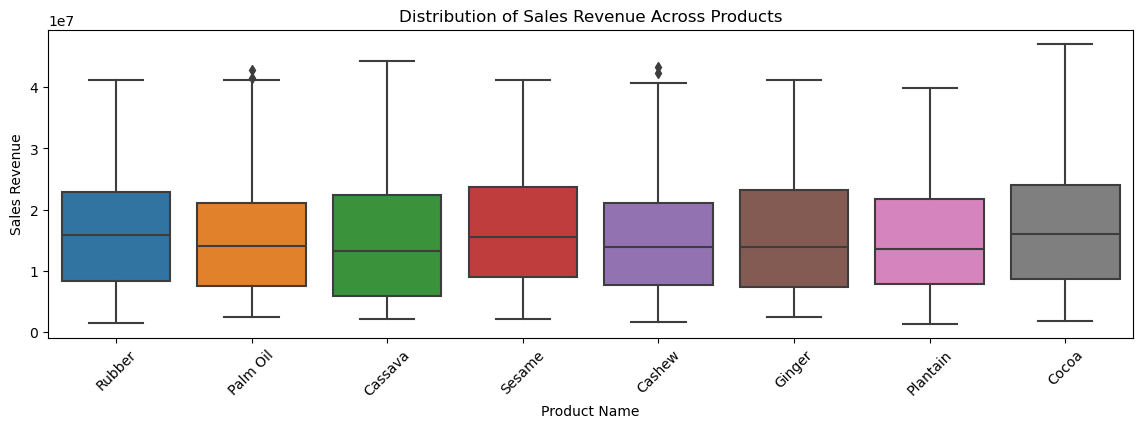

In [172]:
import seaborn as sns

# Plotting a box plot to visualize the distribution of sales revenue across products
plt.figure(figsize=(14, 4))
sns.boxplot(x='Product Name', y='Sales Revenue', data=df)
plt.title('Distribution of Sales Revenue Across Products')
plt.xlabel('Product Name')
plt.ylabel('Sales Revenue')
plt.xticks(rotation=45)
plt.show()

In [19]:
df.to_csv('nig_export_data.csv', index = False)